In [1]:
###################################################################
#           Statistics and Explaratoroty Data Analysis            #
#                        Laboratory 7                             #
#                     ANOVA & related                             #
###################################################################

if(!require(Rcpp)){install.packages("Rcpp")}
library(Rcpp) # rcompanion - R / C++ interface
#?Rcpp

# if(!require(rcompanion)){install.packages("rcompanion")}
# library(rcompanion) # plotNormalHistogram(x), groupWiseMean(x)
# # ?`rcompanion-package`

if(!require(psych)){install.packages("psych")}
library(psych) #describe()
# ?psych


if(!require(exactRankTests)){install.packages("exactRankTests")}
library(exactRankTests) #Ansari-Bradley and Wilcoxon exact test with ties

if(!require(DescTools)){install.packages("DescTools")}
library(DescTools) #sign test, gtest


if(!require(normtest)){install.packages("normtest")}
library(normtest) #jb.norm.test & others

if(!require(lattice)){install.packages("lattice")}
library(lattice) #drawings tunning

if(!require(RVAideMemoire)){install.packages("RVAideMemoire")}
library(RVAideMemoire) #mood.medtest

if(!require(FSA)){install.packages("FSA")}
library(FSA) #Summarize

if(!require(ggplot2)){install.packages("ggplot2")}
library(ggplot2) #drawings tuning


#ANOVA

if(!require(car)){install.packages("car")}
library(car) #Anova

if(!require(lsmeans)){install.packages("lsmeans")}
library(lsmeans) #lsmeans, cld

#KRUSKAL - WALLIS

if(!require(dunn.test)){install.packages("dunn.test")}
library(dunn.test) #dunn.test

if(!require(conover.test)){install.packages("conover.test")}
library(conover.test) #conover.test




 
### Mixed models

if(!require(lme4)){install.packages("lme4")}
library(lme4)

if(!require(lmerTest)){install.packages("lmerTest")}
library(lmerTest) #anova after lmer

if(!require(multcompView)){install.packages("multcompView")}
library(multcompView) #multcompLetters

if(!require(multcomp)){install.packages("multcomp")}
library(multcomp) #multcompLetters

if(!require(phia)){install.packages("phia")}
library(phia) #plots of interactions
?phia


if(!require(nlme)){install.packages("nlme")}
library(nlme)

if(!require(AICcmodavg)){install.packages("AICcmodavg")}
library(AICcmodavg)


#Set English in R
Sys.setenv(LANG = "en")

options(scipen=999) #avoiding e10 notation


Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.0.5"
Loading required package: psych

Warning message:
"package 'psych' was built under R version 4.0.5"
Loading required package: exactRankTests

Warning message:
"package 'exactRankTests' was built under R version 4.0.5"
 Package 'exactRankTests' is no longer under development.
 Please consider using package 'coin' instead.


Loading required package: DescTools

Warning message:
"package 'DescTools' was built under R version 4.0.5"

Attaching package: 'DescTools'


The following objects are masked from 'package:psych':

    AUC, ICC, SD


Loading required package: normtest

Loading required package: lattice

Loading required package: RVAideMemoire

Warning message:
"package 'RVAideMemoire' was built under R version 4.0.5"
*** Package RVAideMemoire v 0.9-80 ***

Loading required package: FSA

Warning message:
"package 'FSA' was built under R version 4.0.5"
## FSA v0.9.1. See citation('FSA') if

In [2]:
####################################


# ONE-WAY ANOVA


####################################

Input <- ("
Year       Student  Wrkday
          '1st year'  a        1200
          '1st year'  b        1400
          '1st year'  c        1350
          '1st year'  d         950
          '1st year'  e        1400
          '1st year'  f        1150
          '1st year'  g        1300
          '1st year'  h        1325
          '1st year'  i        1425
          '1st year'  j        1500
          '1st year'  k        1250
          '1st year'  l        1150
          '1st year'  m         950
          '1st year'  n        1150
          '1st year'  o        1600
          '1st year'  p        1300
          '1st year'  q        1050
          '1st year'  r        1300
          '1st year'  s        1700
          '1st year'  t        1300
          '2nd year'  u        1100
          '2nd year'  v        1200
          '2nd year'  w        1250
          '2nd year'  x        1050
          '2nd year'  y        1200
          '2nd year'  z        1250
          '2nd year'  aa       1350
          '2nd year'  ab       1350
          '2nd year'  ac       1325
          '2nd year'  ad       1525
          '2nd year'  ae       1225
          '2nd year'  af       1125
          '2nd year'  ag       1000
          '2nd year'  ah       1125
          '2nd year'  ai       1400
          '2nd year'  aj       1200
          '2nd year'  ak       1150
          '2nd year'  al       1400
          '2nd year'  am       1500
          '2nd year'  an       1200
          '3rd year'  u        1600
          '3rd year'  v        1700
          '3rd year'  w        1450
          '3rd year'  x        1650
          '3rd year'  y        1800
          '3rd year'  z        1550
          '3rd year'  aa       1950
          '3rd year'  ab       1750
          '3rd year'  ac       1925
          '3rd year'  ad       1825
          '3rd year'  ae       1625
          '3rd year'  af       1525
          '3rd year'  ag       1800
          '3rd year'  ah       1725
          '3rd year'  ai       1200
          '3rd year'  aj       1600
          '3rd year'  ak       1950
          '3rd year'  al       1100
          '3rd year'  am       1400
          '3rd year'  an       1600
          ")


Data <- read.table(textConnection(Input),header=TRUE)

In [3]:
head(Data)

,Year,Student,Wrkday
,<chr>,<chr>,<int>
1,1st year,a,1200
2,1st year,b,1400
3,1st year,c,1350
4,1st year,d,950
5,1st year,e,1400
6,1st year,f,1150


In [4]:
# Preanalysis of data

# Descriptive statistics

Summarize(Wrkday ~ Year, data = Data, digits = 3)

Year,n,mean,sd,min,Q1,median,Q3,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1st year,20,1287.50,193.734,950,1150.00,1300.0,1400,1700
2nd year,20,1246.25,142.412,1000,1143.75,1212.5,1350,1525
3rd year,20,1636.25,227.902,1100,1543.75,1637.5,1800,1950


In [5]:
# Skewness & Kurtosis?
describe (Data[Data$Year == "1st year","Wrkday"])
describe (Data[Data$Year == "2nd year","Wrkday"])
describe (Data[Data$Year == "3rd year","Wrkday"])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,20,1287.5,193.7341,1300,1284.375,166.7925,950,1700,750,0.1186154,-0.4626583,43.32026


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,20,1246.25,142.4123,1212.5,1240.625,148.26,1000,1525,525,0.3030858,-0.8453012,31.84435


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,20,1636.25,227.9016,1637.5,1657.812,203.8575,1100,1950,850,-0.6558086,-0.1692253,50.96035


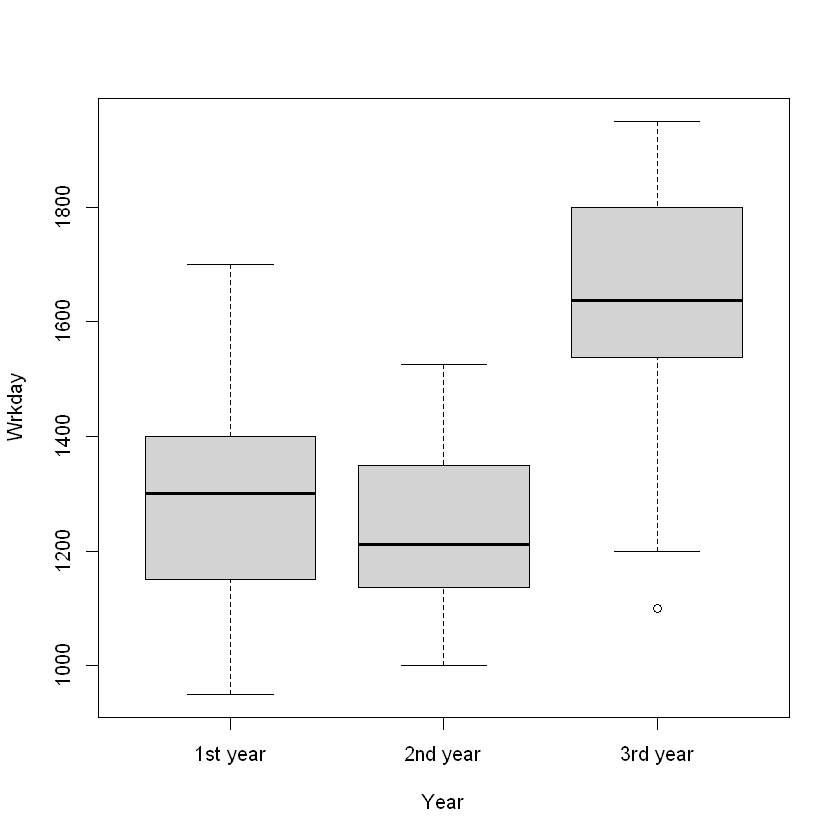

In [6]:
# Boxplot

boxplot (Wrkday~Year, data = Data)

In [11]:
install.packages('DescTools', dependencies = TRUE)

Warning message:
"package 'DescTools' is in use and will not be installed"


In [13]:
library(DescTools)

In [14]:
install.packages("rcompanion")
library(rcompanion)

Installing package into 'C:/Users/Ankara/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

Warning message:
"package 'rcompanion' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


ERROR: Error in library(rcompanion): there is no package called 'rcompanion'


In [7]:
#Mean with CI
      Sum <- groupwiseMean(Wrkday ~ Year, data   = Data, conf   = 0.95, digits = 3, traditional = FALSE, percentile  = TRUE)
      # traditional=T - traditional confidence intervals for the group means, using the t-distribution
      # percentile  = TRUE -  percentile confidence intervals for the group means by bootstrap
      
      #plot 
      ggplot(Sum, aes(x = Year, y = Mean)) +
        geom_errorbar(aes(ymin = Percentile.lower, ymax = Percentile.upper), width = 0.05, size  = 0.5) +
        geom_point(shape = 15, size  = 4) +
        theme_bw() +
        theme(axis.title   = element_text(face  = "bold")) +
        ylab("Mean Wrkday, mg")

# due to r companion package, i can't have it

ERROR: Error in groupwiseMean(Wrkday ~ Year, data = Data, conf = 0.95, digits = 3, : could not find function "groupwiseMean"


In [8]:
#### ONE-WAY ANOVA analysis
# Estimating a linear model

model <- lm(Wrkday~Year, data = Data)

summary(model)

# F test for all betas=0
# Rejecting H0 indicates that there is significant difference betwee averages


Call:
lm(formula = Wrkday ~ Year, data = Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-536.25 -113.75    3.75  112.81  412.50 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)   1287.50      42.77  30.103 < 0.0000000000000002 ***
Year2nd year   -41.25      60.49  -0.682                0.498    
Year3rd year   348.75      60.49   5.766          0.000000347 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 191.3 on 57 degrees of freedom
Multiple R-squared:  0.4682,	Adjusted R-squared:  0.4496 
F-statistic:  25.1 on 2 and 57 DF,  p-value: 0.00000001524


In [21]:
#ANOVA analysis results
Anova(model)   
### In this case F test from summary is the same F test as for Anova
# Because we have only one indepent variables --> all betas for different Years levels
# Conclusions? There is difference in means? In which particurarlly? Whe don't know.

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Year,1836188,2,25.0952,0.00000001524016
Residuals,2085313,57,NA,NA


In [27]:
#Diagnostics
#are residuals normal?

res <- residuals(model)
describe(res)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,60,-0.000000000000005182371,188.0007,3.75,4.401042,166.7925,-536.25,412.5,948.75,-0.3022393,0.2279389,24.27079


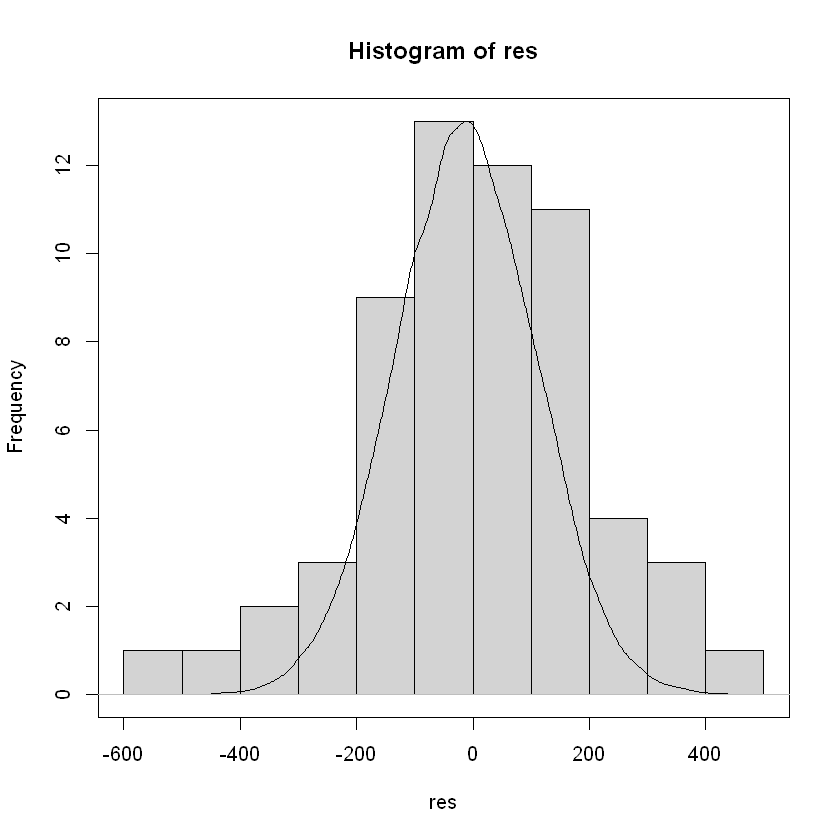

In [43]:
hist(res)
par(new = T)
plot(density(rnorm(60000,0,188)), xlab="", ylab="", main = "", yaxt ="n", xaxt ="n")

In [44]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.98434, p-value = 0.6358


In [45]:
#are variances equal to each other?
# equality of variance tests for more then 2 samples
# H0:all samples have the same variance
# H1:variance is not the same for all samples
bartlett.test(Wrkday ~ Year, data = Data) #assuming normality


	Bartlett test of homogeneity of variances

data:  Wrkday by Year
Bartlett's K-squared = 3.9709, df = 2, p-value = 0.1373


In [46]:
# bartlett.test(len ~ interaction(supp,dose), data=ToothGrowth)
leveneTest(Wrkday ~ Year, data = Data)
fligner.test(Wrkday ~ Year, data = Data)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,1.178553,0.3151089
,57,NA,NA



	Fligner-Killeen test of homogeneity of variances

data:  Wrkday by Year
Fligner-Killeen:med chi-squared = 2.1912, df = 2, p-value = 0.3343
